In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


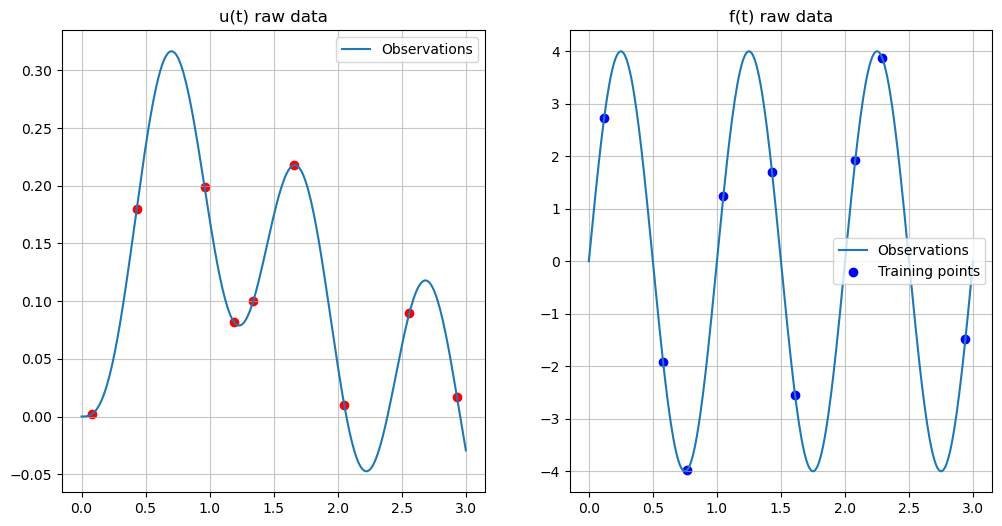

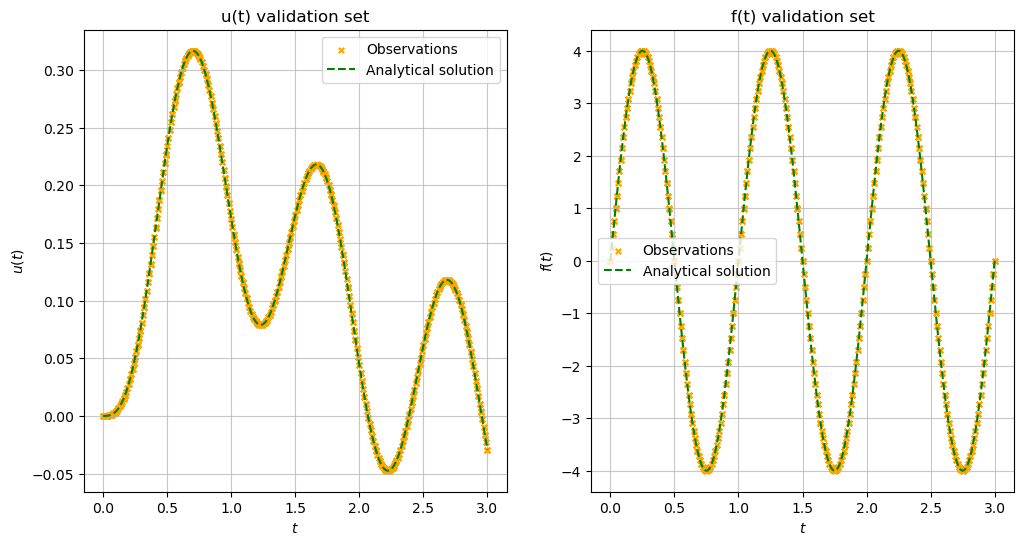

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model.set_training_data("damped_m1k2b1.csv",9,[1e-8,1e-8],seeds_training)
model.plot_raw_data(Training_points=True)
model.set_validation_data(1200)
model.plot_validation_set()


In [ ]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 4000, 10

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("Nelder-Mead",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      

100%|██████████| 4000/4000 [04:16<00:00, 15.60it/s]


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -4.355005264282227
             x: [ 4.891e-01  5.860e-01  9.990e-01  1.993e+00  1.999e+00]
           nit: 476
          nfev: 828
 final_simplex: (array([[ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00],
                       [ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00],
                       ...,
                       [ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00],
                       [ 4.891e-01,  5.860e-01, ...,  1.993e+00,
                         1.999e+00]]), array([-4.355e+00, -4.355e+00, -4.355e+00, -4.355e+00,
                       -4.355e+00, -4.355e+00]))


In [ ]:
print(model.get_params())

[0.48909158 0.58601285 0.99895693 1.99258569 1.99875862]


In [ ]:
results = {"nf_n=9_melder": (np.array([0.47898825, 0.62987094, 0.998272  , 1.99920782, 2.00517421]),-4.336967468261719, [1e-8,1e-8]),
           "nf_n=9_TNC": (np.array([0.43243174, 0.30849485, 0.99643949, 1.98091363, 1.97461053]),-2.882169723510742, [1e-8,1e-8]),
            "nf_n=9_melder_4000":([0.48909158, 0.58601285, 0.99895693, 1.99258569, 1.99875862],-4.355005264282227, [1e-8,1e-8])}

In [ ]:
model.set_params(results["nf_n=9_melder_4000"][0])

 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:545: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:546: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:559: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:560: RuntimeWarning:invalid value encountered in sqrt


{'u': 1.4192092123721523e-07, 'f': 0.004609841387718916}

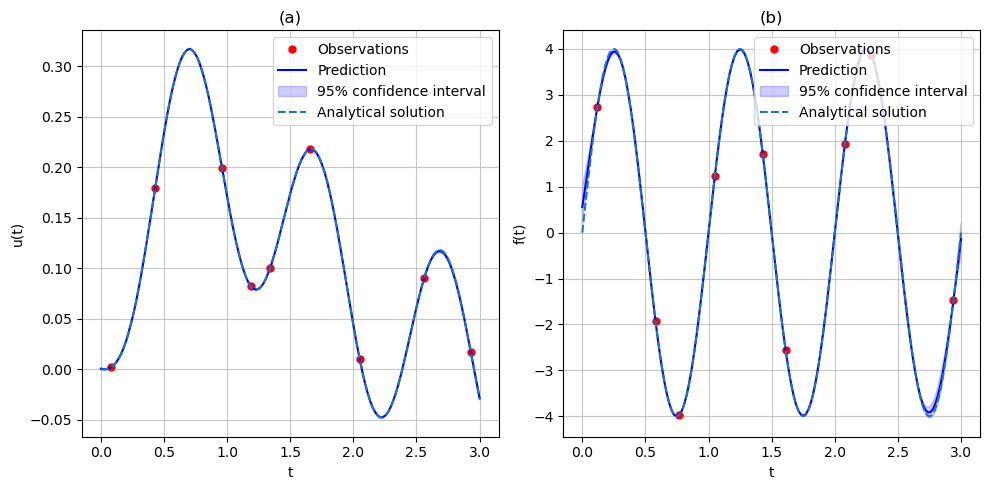

In [ ]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
model.MSE
#print(model)

 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1002: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1003: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1016: RuntimeWarning:invalid value encountered in sqrt
 /home/tobias/code/Code_bac/final_examples/oscillator/../../PI_GP_regressor/main_class.py:1017: RuntimeWarning:invalid value encountered in sqrt


---------GPY--------
MSE u:  0.0005469740851882291
MSE f:  2.6924414196064235


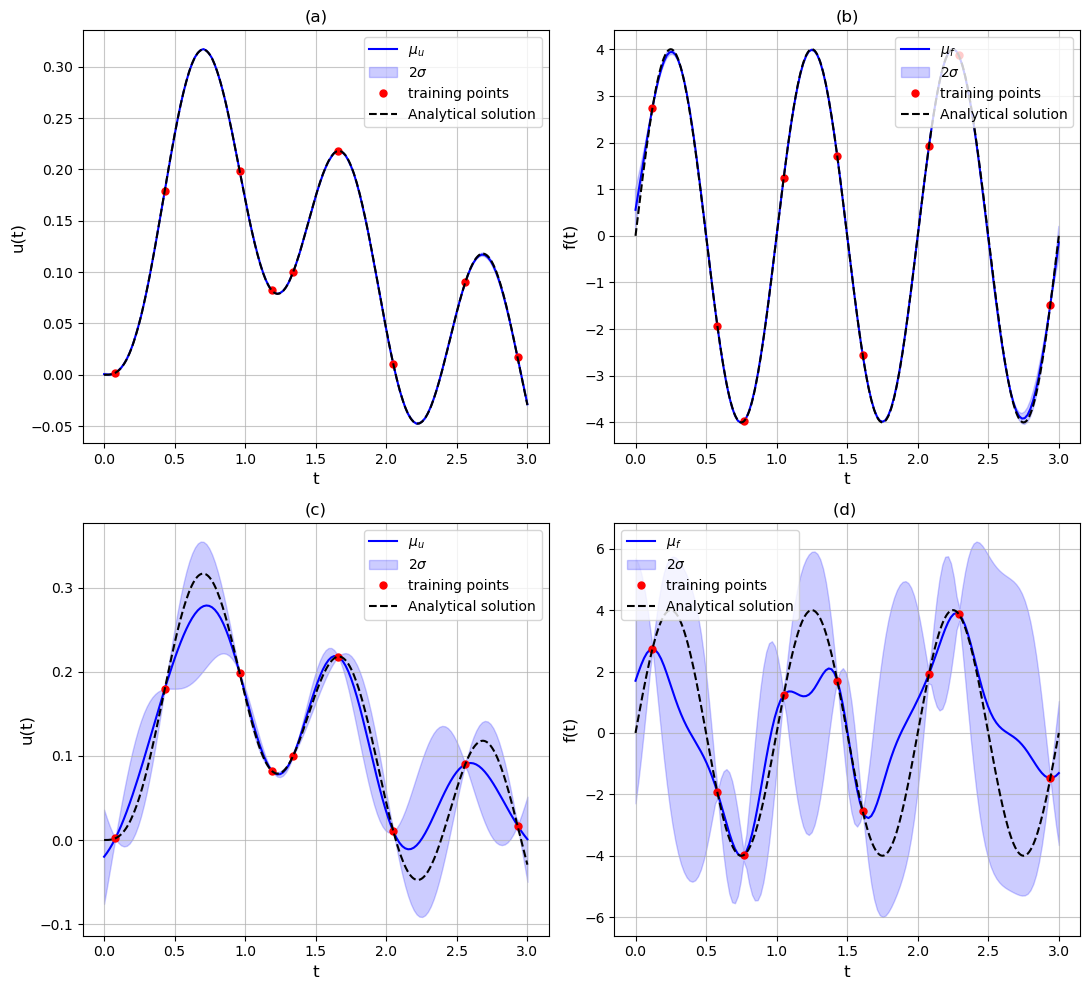

In [ ]:
model.plot_merged_1d_plots(X_star, "merged_1d_plots.png",(11,10))

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


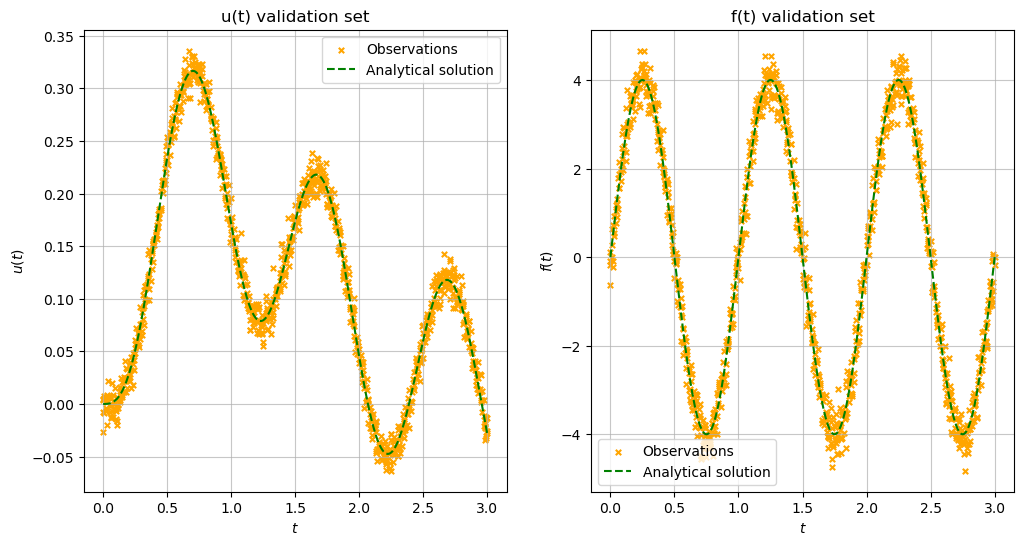

In [6]:
seeds_training = [50,38]
model2 = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model2.set_training_data("damped_m1k2b1.csv",9,[1e-4,1e-1],seeds_training)
model2.set_validation_data(1000)
model2.plot_validation_set()
#model2.plot_raw_data(Training_points=True)


In [7]:
n_iterations, n_threads = 800,12
model2.jitter = 1e-6
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial

model2.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})model2.set_params(x2)

100%|██████████| 800/800 [02:01<00:00,  6.60it/s]


     fun: 3.55580472946167
     jac: array([ 0.05783081,  0.04977417, -0.03515625, -0.00480652,  0.00489044],
      dtype=float32)
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 77
     nit: 14
  status: 2
 success: True
       x: array([0.36381984, 0.25270992, 0.98044506, 1.71331739, 0.9589745 ])


-----------------------------------------------
GP with kernel: 
Training data: (9, 1)
Training targets: (18, 1)
Hyperparameters: {'l': 0.36381983698483233, 'sigma_f': 0.2527099219834507, 'm': 0.9804450567193242, 'b': 1.7133173925396663, 'k': 0.9589744970831524}
Log marginal likelihood: 3.55580472946167
Mean squared error: {'u': 0.0001436342136003077, 'f': 0.15398991107940674}
Relative l2 error: {'u': 0.07846966617233497, 'f': 0.13897086375231202}
-----------------------------------------------



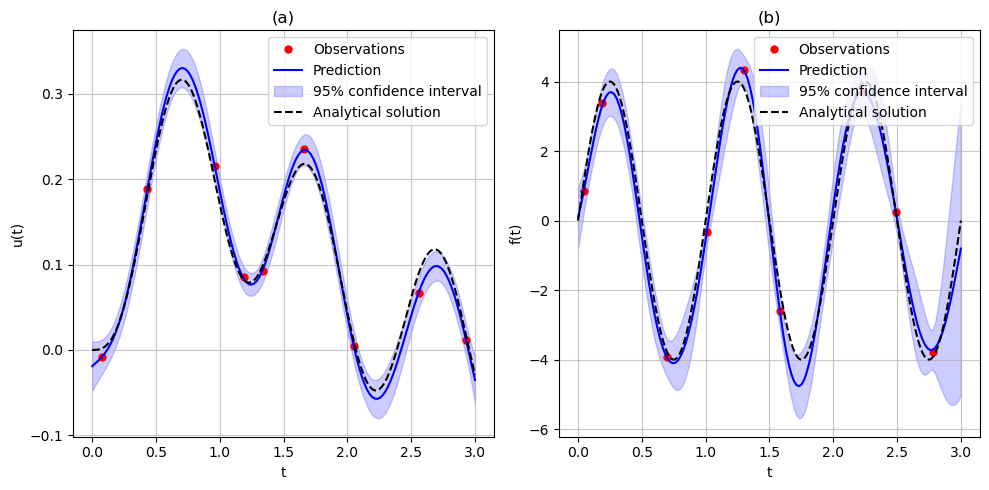

In [9]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model2.predict_model(X_star)
model2.plot_prediction(X_star,"oscillator_with_noise.png","oscillator_noise.png")
model2.error()
print(model2)
#model2.plot_merged_1d_plots(X_star, "o",(11,10))

fun: 3.555784225463867  
     jac: array([-0.06851196,  0.01727295, -0.0453949 ,  0.00055313, -0.00218439],  
      dtype=float32) 
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'   
    nfev: 96   
     nit: 18   
  status: 1 
 success: True 
       x: array([0.36329879, 0.25175648, 0.9802112 , 1.71165971, 0.95101893]) 
{'u': 0.07846240055987475, 'f': 0.1390139924376683}   

In [ ]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations = 1000
for n in [5,10,20,50]:
    print("This is model with n = ", n)
    modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
    modeln.set_training_data("damped_m1k2b1.csv",n,[1e-8,1e-8],seeds_training)
    modeln.set_validation_data(1000)
    modeln.train("Nelder-Mead",n_iterations,12,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
    modeln.predict_model(X_star)
    modeln.plot_prediction(X_star,"",None)
    modeln.error()
    #modeln.MSE
    print(modeln)
    print("-----------------------------------------------------------")